<a href="https://colab.research.google.com/github/davidheram/Regularized-linear-regression./blob/main/Regularized_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [228]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")

In [229]:
df.shape

(3140, 108)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [231]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [233]:
df.isnull().sum().sort_values(ascending=False)

,0
fips,0
TOT_POP,0
0-9,0
0-9 y/o % of total pop,0
19-Oct,0
...,...
CKD_prevalence,0
CKD_Lower 95% CI,0
CKD_Upper 95% CI,0
CKD_number,0


In [234]:
df.duplicated().sum()

np.int64(0)

In [235]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [236]:
df.drop(columns = ["diabetes_Lower 95% CI","diabetes_number","TOT_POP","0-9 y/o % of total pop","10-19 y/o % of total pop","30-39 y/o % of total pop"], inplace=True)

In [237]:
pd.set_option('display.max_columns', None)

In [238]:
df

,fips,0-9,19-Oct,20-29,20-29 y/o % of total pop,30-39,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,6787,7637,6878,12.370281,7089,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,13.8,3.1,2.9,3.3,1326,3
1,1003,24757,26913,23579,10.814964,25213,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,13.1,3.2,3.0,3.5,5479,4
2,1005,2732,2960,3268,13.134520,3201,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,12209,49.069571,12042,48.398376,164,0.659137,113,0.454162,46,0.184880,307,1.233873,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,27.0,35.7,25.1,12.2,6788,30.9,43.9,36.7,34382,31157,37607,8373,7940

In [239]:
target ="diabetes_prevalence"
id_cool = "fips"

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include="object").columns

In [240]:
df[target].describe()

,diabetes_prevalence
count,3140.000000
mean,13.073503
std,2.724351
min,6.100000
25%,11.200000
50%,12.800000
75%,14.800000
max,25.600000


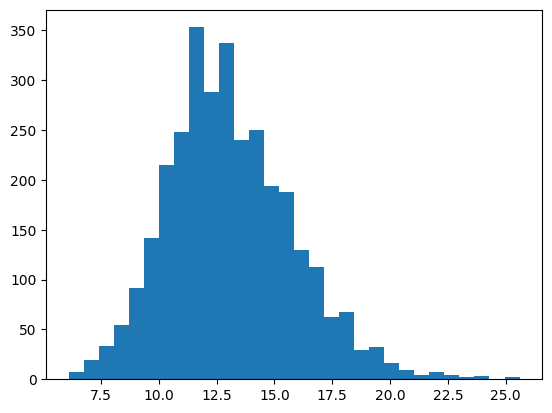

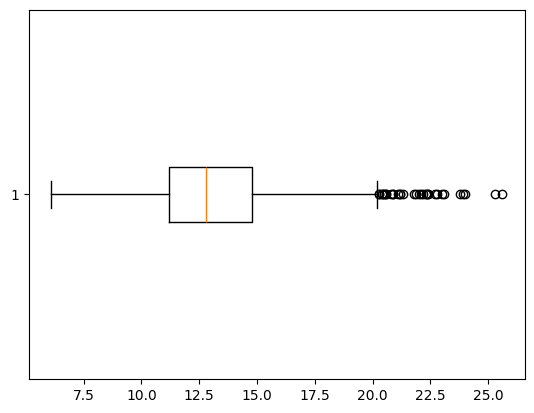

In [241]:
plt.hist(df[target], bins=30)
plt.xlabel = "diabetes prevalence"
plt.ylabel = "frecuencia"
plt.show()


plt.boxplot(df[target], vert=False)
plt.show()

In [242]:
df["Urban_rural_code"].value_counts()

,count
Urban_rural_code,
6,1333
5,641
3,372
2,368
4,358
1,68


<Axes: xlabel='Urban_rural_code', ylabel='count'>

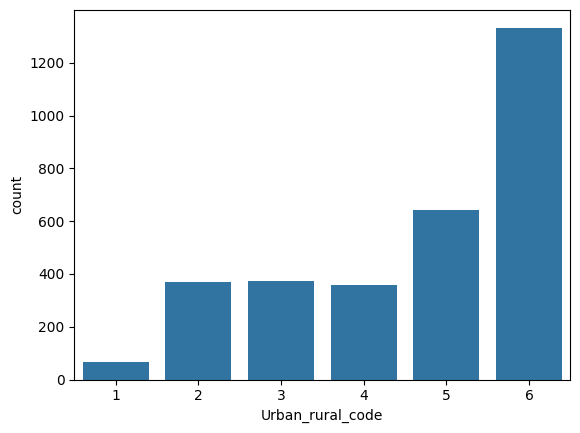

In [243]:
sns.countplot(x="Urban_rural_code", data=df)

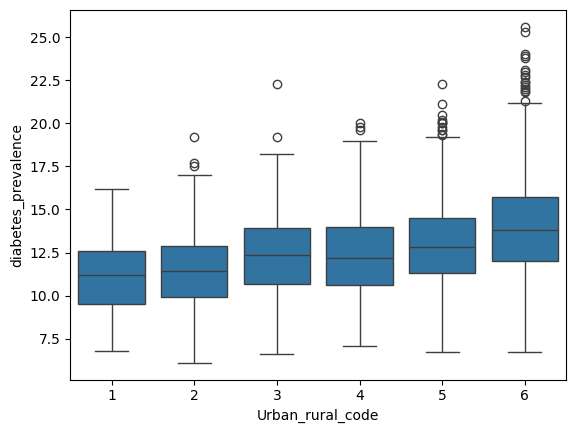

In [244]:
sns.boxplot(x="Urban_rural_code", y=target, data=df)
plt.show()

In [245]:
corr_target = pd.DataFrame((df[numeric_cols].corr()[target].drop(target).abs().sort_values(ascending=False)))
corr_target


,diabetes_prevalence
diabetes_Upper 95% CI,0.998409
CKD_Lower 95% CI,0.924630
CKD_prevalence,0.918514
CKD_Upper 95% CI,0.906711
anycondition_Lower 95% CI,0.856473
...,...
Black-alone pop,0.065542
R_birth_2018,0.032349
STATE_FIPS,0.031925
fips,0.031057


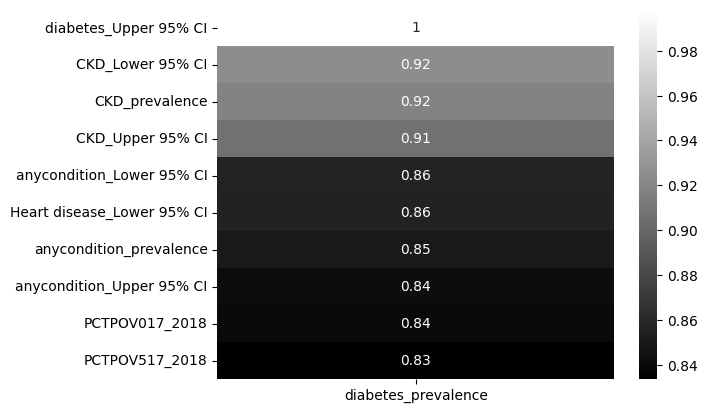

In [246]:
ax = sns.heatmap(corr_target.head(10), annot=True, cmap='gray')

In [247]:
selected_features = corr_target[corr_target >= 0.3].index.tolist()

Dataset listo para modelar

In [248]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
y_preds = model.predict(X_test)
mean_squared_error(y_test, y_preds)

[ 9.36589953e-01  1.35083462e-01  1.90881922e-02 -7.49978829e-02
  1.06855147e-02  1.22806342e-01  8.86794950e-02 -9.82050471e-02
  7.62725154e-05 -1.06348793e-04  2.01792826e-01  4.84687622e-02
 -2.91929536e-01  1.39720093e-01 -1.64337434e-01 -3.56273438e-06
  8.04868290e-08  8.04879747e-08 -2.07769099e-06  2.23866784e-06
  1.09095170e-02 -3.38523494e-04 -1.07760347e-02 -1.13198237e-02
 -1.41570339e-02  2.34349630e-04  4.72954817e-03 -1.97043259e-03
 -1.24504371e-02  3.35518133e-04 -6.00897526e-04  2.05135566e-03
 -2.54935795e-03  5.09984033e-03 -5.65648458e-04  1.96095699e-03
 -8.88497054e-04  5.03439572e-04  1.17811732e-03 -1.27862701e-02
 -6.57605365e-04  4.33052406e-03 -8.62503429e-07  5.38440568e-07
 -1.43303887e-03  7.63747568e-04 -8.72791530e-05  2.91171263e-02
  5.06098747e-07 -6.44956652e-05 -1.63269662e-05 -2.90107874e-02
  9.35821125e-08 -1.75832445e-07  3.39098425e-05 -3.60707319e-05
  9.92637031e-07  2.39779514e-07  5.42926513e-07 -5.24429582e-07
  1.96458647e-07 -1.52407

0.003061379420919473

In [249]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, model.predict(X))
mse

0.002766904978468856

In [253]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=42)

In [251]:
robot_lasso = Lasso(alpha =  0.000756, max_iter = 10000)
robot_lasso.fit(X_train, y_train)
preds = robot_lasso.predict(X_test)
mean_squared_error(y_test, preds)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.836e+00, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(


0.003509870008348698

In [252]:
robot_ridge = Ridge(alpha = 10000000, max_iter = 10000)
robot_ridge.fit(X_train, y_train)
preds = robot_ridge.predict(X_test)
mean_squared_error(y_test, preds)

2.9856536228663777